# Project 2 - Arctic ice maps

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis. 

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2023 with the exception of 2012. All the data were already downloaded and transformed for you to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). One of the main issues to work on scientific data with Python is to first read them from various formats into `numpy`-arrays.



In [1]:
# The glob-module allows you to use Linux style
# pathname expansion
import glob
import numpy as np

# generate a list of files matching the Unix-pattern
# /home/share/Project_2/ice_data/2*. These are all
# necessary ice-data files for the project:
datapath = "/home/share/Project_2/ice_data"
filelist = np.sort(glob.glob(f"{datapath}/2*"))

# print the first ten files:
print(filelist[:10])


['/home/share/Project_2/ice_data/20030101.npy'
 '/home/share/Project_2/ice_data/20030115.npy'
 '/home/share/Project_2/ice_data/20030201.npy'
 '/home/share/Project_2/ice_data/20030215.npy'
 '/home/share/Project_2/ice_data/20030301.npy'
 '/home/share/Project_2/ice_data/20030315.npy'
 '/home/share/Project_2/ice_data/20030401.npy'
 '/home/share/Project_2/ice_data/20030415.npy'
 '/home/share/Project_2/ice_data/20030501.npy'
 '/home/share/Project_2/ice_data/20030515.npy']


The data that we have here cover more than the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

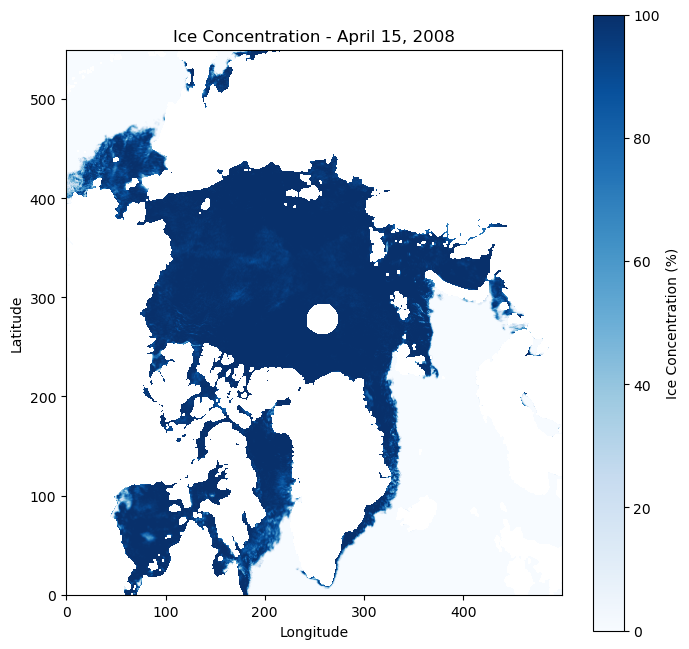

In [13]:
# your solutions can start here
import os
import numpy as np
import matplotlib.pyplot as plt
import glob


# Load sample data
file_path = '/home/share/Project_2/ice_data/20080415.npy'
data = np.load(file_path)

# Create a plot with specific size
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the data with imshow, setting origin to 'lower' and using a colormap
cax = ax.imshow(data, origin='lower', cmap=plt.cm.Blues)

# Add a colorbar to the plot
cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
cbar.set_label('Ice Concentration (%)')

# Set title and labels
ax.set_title('Ice Concentration - April 15, 2008')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()

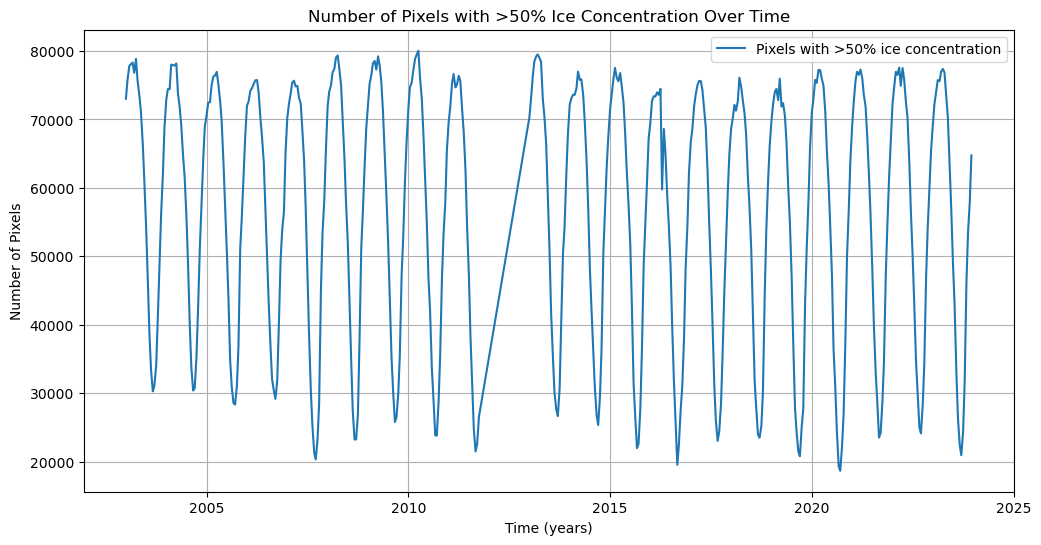

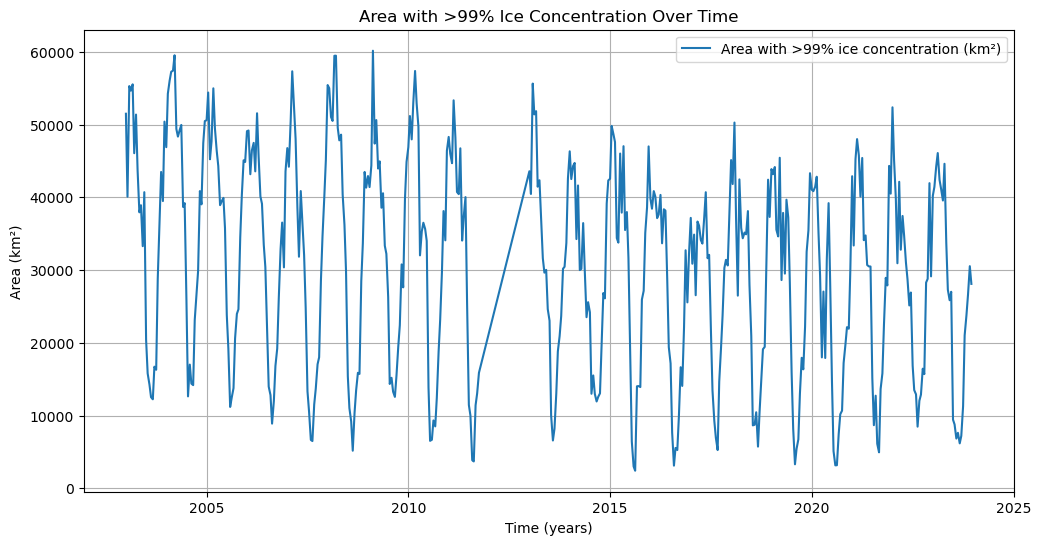

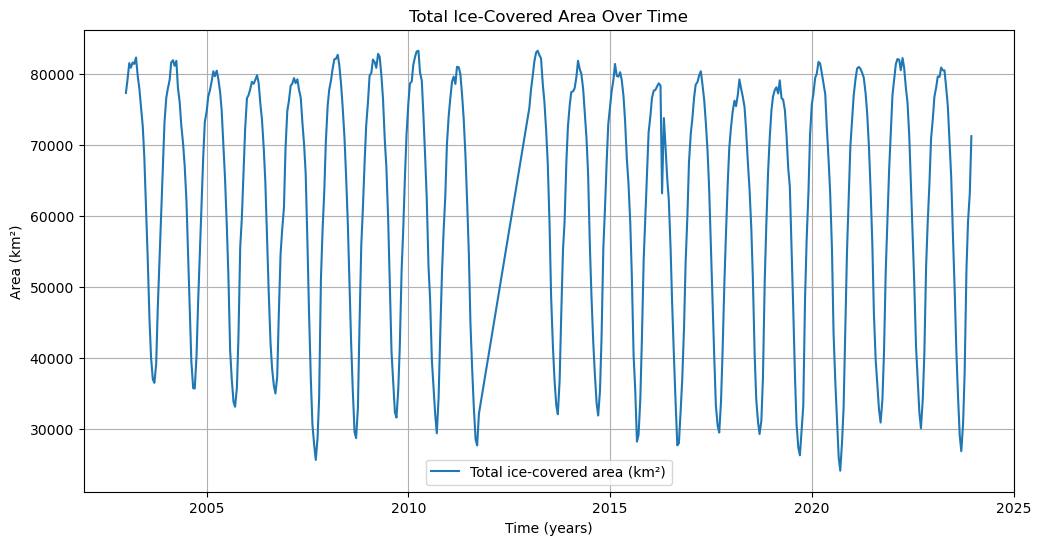

In [14]:
import glob

# Generate a list of files matching the Unix-pattern
datapath = '/home/share/Project_2/ice_data'
filelist = np.sort(glob.glob(f'{datapath}/2*'))

# Initialize lists to store results
times = []
pixels_above_50 = []
areas_above_99 = []
total_ice_areas = []

# Loop over files
for file in filelist:
    # Extract the date from the filename
    filename = file.split('/')[-1]
    year = int(filename[0:4])
    month = int(filename[4:6])
    day = int(filename[6:8])
    
    # Calculate fractional time
    fractional_time = year + (month - 1) * 30 / 360 + (day - 1) / 360
    times.append(fractional_time)
    
    # Load the data
    data = np.load(file)
    
    # Count pixels with concentration above 50%
    num_pixels_above_50 = np.sum(data > 50)
    pixels_above_50.append(num_pixels_above_50)
    
    # Calculate total area with concentration above 99%
    area_above_99 = np.nansum(data > 99)
    areas_above_99.append(area_above_99)
    
    # Calculate total ice-covered area
    total_ice_area = np.nansum(data > 0)
    total_ice_areas.append(total_ice_area)

# Plot number of pixels with concentration above 50% against time
plt.figure(figsize=(12, 6))
plt.plot(times, pixels_above_50, label='Pixels with >50% ice concentration')
plt.xlabel('Time (years)')
plt.ylabel('Number of Pixels')
plt.title('Number of Pixels with >50% Ice Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot area with concentration above 99% against time
plt.figure(figsize=(12, 6))
plt.plot(times, areas_above_99, label='Area with >99% ice concentration (km²)')
plt.xlabel('Time (years)')
plt.ylabel('Area (km²)')
plt.title('Area with >99% Ice Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot total ice-covered area against time
plt.figure(figsize=(12, 6))
plt.plot(times, total_ice_areas, label='Total ice-covered area (km²)')
plt.xlabel('Time (years)')
plt.ylabel('Area (km²)')
plt.title('Total Ice-Covered Area Over Time')
plt.legend()
plt.grid(True)
plt.show()


#There is a clear seasonal cycle with peaks and troughs each year. 
#The number of pixels with more than 50% ice concentration decreases during the summer months and increases during the winter months. 
#Over the years, the peaks (indicating maximum ice extent) appear to remain relatively stable

#For area with >99% ice concentration over time,The peaks and troughs are more variable compared to the >50% ice concentration plot.
#There appears to be a gradual decline in the maximum values over the years, indicating a reduction in areas with very high ice concentration. The minimum values within each year show a notable decline.

#For total ice covered area over time, similar to the previous plots, there is a seasonal cycle with significant variation between winter and summer months.
#Over the years, there is a visible decline in the minimum values, indicating that the total ice-covered area during summer is decreasing.
#The maximum values also show a slight downward trend, suggesting that even the winter ice extent is reducing over time.

In [15]:
# Find the index of the minimum ice-covered area
min_area_index = np.argmin(total_ice_areas)
min_area_date = filelist[min_area_index].split('/')[-1]

# Extract the date components from the filename
min_year = int(min_area_date[0:4])
min_month = int(min_area_date[4:6])
min_day = int(min_area_date[6:8])

# Get the value of the minimum area
min_area_value = total_ice_areas[min_area_index]

print(f"The date with the smallest ice-covered area is {min_year}-{min_month:02d}-{min_day:02d}")
print(f"The minimum ice-covered area is {min_area_value} km²")


The date with the smallest ice-covered area is 2020-09-15
The minimum ice-covered area is 24126 km²


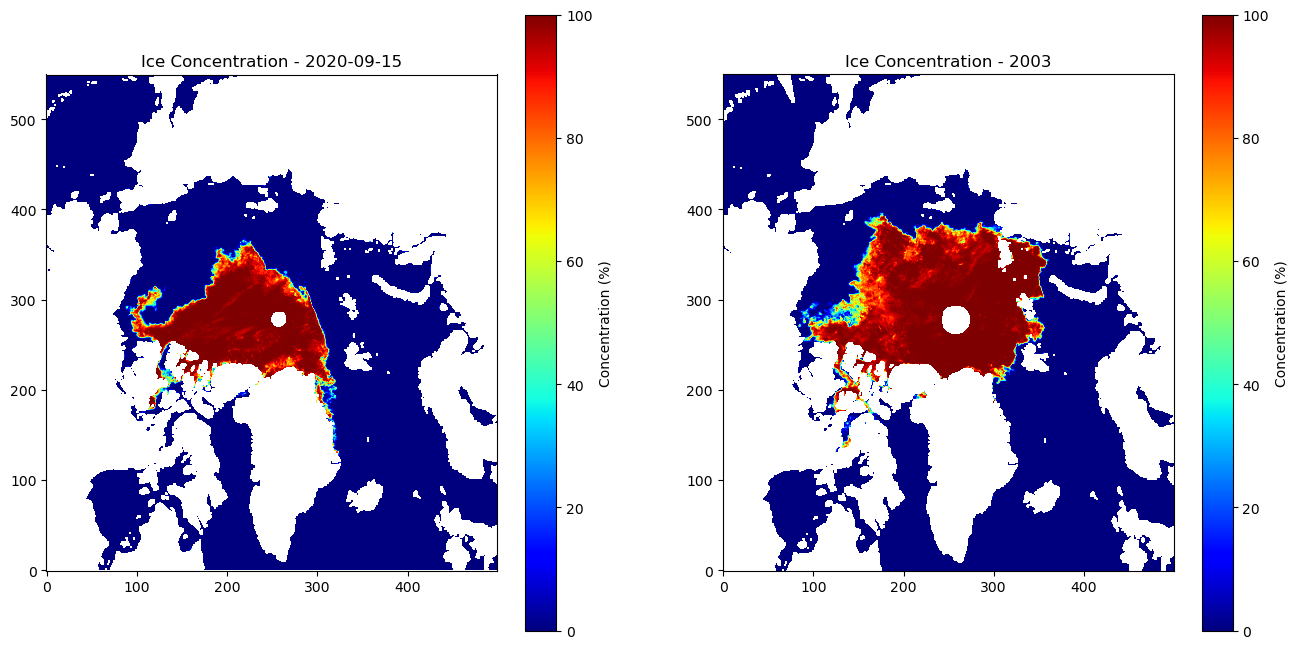

In [16]:
# File path for the minimum date and the same date in 2003
file_min_date = filelist[min_area_index]
file_2003_date = f"{datapath}/{2003:04d}{min_month:02d}{min_day:02d}.npy"

# Load the data
data_min_date = np.load(file_min_date)
data_2003_date = np.load(file_2003_date)

# Create a side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the map for the minimum date
cax1 = axes[0].imshow(data_min_date, origin='lower', cmap=plt.cm.jet)
axes[0].set_title(f'Ice Concentration - {min_year}-{min_month:02d}-{min_day:02d}')
fig.colorbar(cax1, ax=axes[0], orientation='vertical').set_label('Concentration (%)')

# Plot the map for the same date in 2003
cax2 = axes[1].imshow(data_2003_date, origin='lower', cmap=plt.cm.jet)
axes[1].set_title('Ice Concentration - 2003')
fig.colorbar(cax2, ax=axes[1], orientation='vertical').set_label('Concentration (%)')

plt.show()

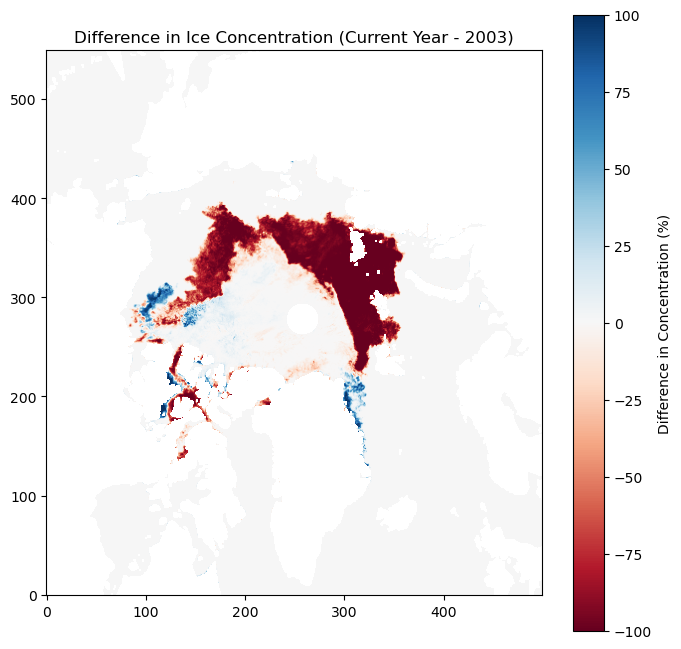

In [17]:
# Compute the difference between the two maps
difference = data_min_date - data_2003_date

# Plot the difference
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(difference, origin='lower', cmap=plt.cm.RdBu)
ax.set_title('Difference in Ice Concentration (Current Year - 2003)')
fig.colorbar(cax, ax=ax, orientation='vertical').set_label('Difference in Concentration (%)')

plt.show()


/tmp/ipykernel_494/677791474.py:15: RuntimeWarning: Mean of empty slice
  monthly_means.append(np.nanmean(monthly_data, axis=0))
/tmp/ipykernel_494/677791474.py:26: RuntimeWarning: Mean of empty slice
  mean_difference = np.nanmean(mean_2021_2023, axis=0) - np.nanmean(mean_2004_2006, axis=0)
/tmp/ipykernel_494/677791474.py:32: RuntimeWarning: Mean of empty slice
  cax1 = axes[0].imshow(np.nanmean(mean_2004_2006, axis=0), origin='lower', cmap=plt.cm.Blues)
/tmp/ipykernel_494/677791474.py:37: RuntimeWarning: Mean of empty slice
  cax2 = axes[1].imshow(np.nanmean(mean_2021_2023, axis=0), origin='lower', cmap=plt.cm.Blues)


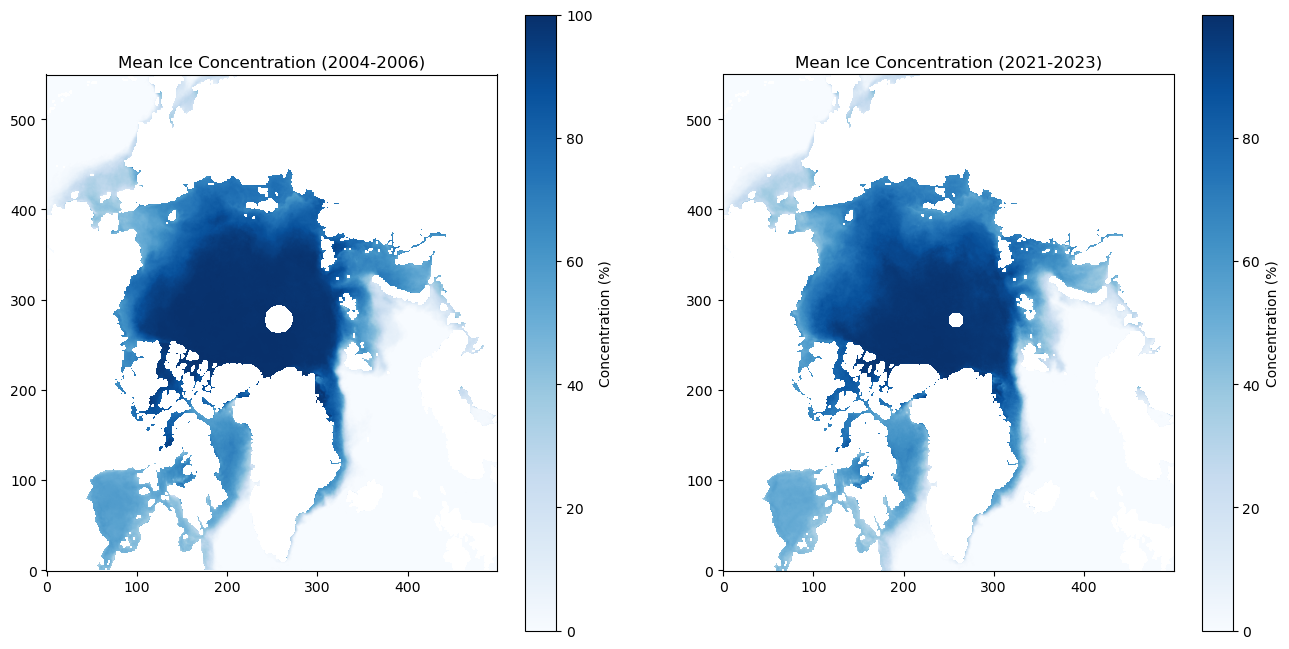

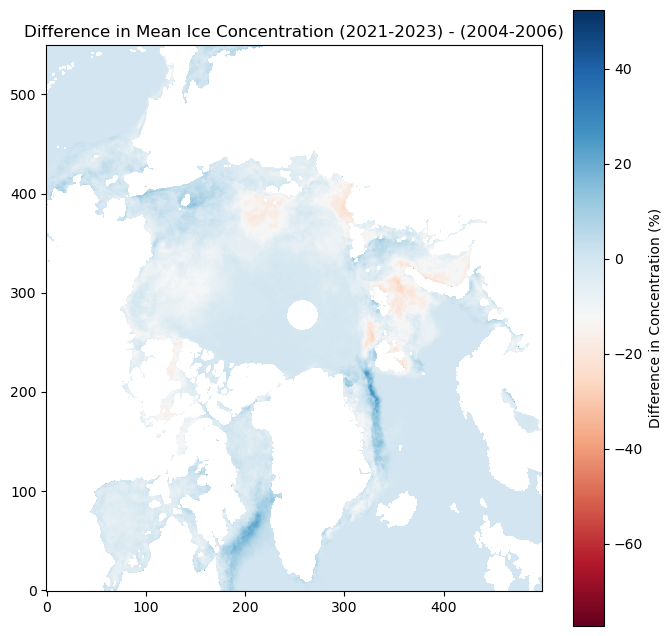

In [18]:
# Function to calculate the mean ice concentration for a given period
def calculate_mean_concentration(start_year, end_year, datapath):
    monthly_means = []
    for month in range(1, 13):
        monthly_data = []
        for year in range(start_year, end_year + 1):
            for day in [1, 15]:
                file_path = f"{datapath}/{year:04d}{month:02d}{day:02d}.npy"
                # Check if the file exists before loading in order to not getting the "mean of empty slice", even though i still get the error, no matter what i try i kept getting it. 
                if os.path.exists(file_path):
                    data = np.load(file_path)
                    monthly_data.append(data)
        # Calculate the mean only if monthly_data is not empty
        if monthly_data:
            monthly_means.append(np.nanmean(monthly_data, axis=0))
        else:
            # Handle the case where no data files were found for the month
            monthly_means.append(np.nan)  # or use an appropriate fill value
    return monthly_means

# Calculate mean ice concentrations
mean_2004_2006 = calculate_mean_concentration(2004, 2006, datapath)
mean_2021_2023 = calculate_mean_concentration(2021, 2023, datapath)

# Compute the difference in mean concentrations
mean_difference = np.nanmean(mean_2021_2023, axis=0) - np.nanmean(mean_2004_2006, axis=0)

# Plot the mean concentrations for January to December
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot mean concentration for 2004-2006
cax1 = axes[0].imshow(np.nanmean(mean_2004_2006, axis=0), origin='lower', cmap=plt.cm.Blues)
axes[0].set_title('Mean Ice Concentration (2004-2006)')
fig.colorbar(cax1, ax=axes[0], orientation='vertical').set_label('Concentration (%)')

# Plot mean concentration for 2021-2023
cax2 = axes[1].imshow(np.nanmean(mean_2021_2023, axis=0), origin='lower', cmap=plt.cm.Blues)
axes[1].set_title('Mean Ice Concentration (2021-2023)')
fig.colorbar(cax2, ax=axes[1], orientation='vertical').set_label('Concentration (%)')

plt.show()

# Plot the difference in mean concentrations
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(mean_difference, origin='lower', cmap=plt.cm.RdBu)
ax.set_title('Difference in Mean Ice Concentration (2021-2023) - (2004-2006)')
fig.colorbar(cax, ax=ax, orientation='vertical').set_label('Difference in Concentration (%)')

plt.show()
